# Reddit r/politics/hot top comment analyses

Reddit is an extremely popular online forum, ranking as #23 in internet traffic engagement(according to https://www.alexa.com/siteinfo/reddit.com). It is broken into subreddits, shortcut as r/, where users can post relevant links, images, videos, or simply text posts relevant to the particular subreddit. These posts are sometimes called threads. Other users may then reply to these threads with comments. This allows other users to reply to their comments, allowing for robust(occasionally), informative(sometimes), interesting(inane?) and diverse(hah!) conversation. 

All users registered to Reddit may upvote or downvote any thread or comment on the site, creating a score for each item. This score is known as Karma. Reddit also tracks the total Karma for each user (the cumulative of their earned karma from their posts comments). 

The purpose of this project is to analyze the top comments in trending  threads from the r/politics subreddit, in the section known as hot/. Put all of this together, and you get the URL of the site we are scraping for data: https://www.reddit.com/r/politics/hot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from datetime import datetime, timedelta


#Reads dataframe from .csv
df = pd.read_csv('out.csv')
print(len(df))

#Changes columns back to DateTime, cleans out AutoModerator posts
df = df.astype({'AccountDateTime': 'datetime64', 'CommentDateTime': 'datetime64', 'ThreadDateTime': 'datetime64'})
print(df.dtypes)
df = df[df['Name'] != 'AutoModerator']

df.head()

2024
Name                            object
TotalKarma                       int64
CommentLength                    int64
CommentDateTime         datetime64[ns]
AccountDateTime         datetime64[ns]
ThreadDateTime          datetime64[ns]
CommentKarma                     int64
AdjustedKarma                    int64
AdjustedKarmaPercent           float64
CommentURL                      object
dtype: object


,Name,TotalKarma,CommentLength,CommentDateTime,AccountDateTime,ThreadDateTime,CommentKarma,AdjustedKarma,AdjustedKarmaPercent,CommentURL
0,OutsideObserver,90215,62,2022-03-29 15:12:21,2010-03-20 19:59:53,2022-03-29 14:45:31,1,90214,1.108463e-05,https://www.reddit.com/r/politics/comments/tre...
1,OllieQ25,87272,315,2022-03-29 14:48:18,2020-11-12 10:10:26,2022-03-29 14:45:31,1,87271,1.145843e-05,https://www.reddit.com/r/politics/comments/tre...
2,M00n,1571516,208,2022-03-29 14:50:04,2007-03-06 21:07:15,2022-03-29 14:45:31,1,1571515,6.363282e-07,https://www.reddit.com/r/politics/comments/tre...
3,tifanietiberio,23442,16,2022-03-29 15:08:56,2012-02-20 10:11:41,2022-03-29 14:45:31,1,23441,4.265848e-05,https://www.reddit.com/r/politics/comments/tre...
4,Exocoryak,62765,63,2022-03-29 14:56:19,2017-10-24 02:28:20,2022-03-29 14:45:31,1,62764,1.593245e-05,https://www.reddit.com/r/politics/comments/tre...


### Analysis

Above is a snippet of the data we will be analyzing. I have been scraping data with RedditReader.ipynb and placing it into a .csv file for this section of the project. I have chosen this method for 2 reasons:
    
    1) Data scraping can be tedious, as it involves making several requests of the Reddit API and parsing the information
    2) This allows the opportunity to analyze data over several days of Reddit threads.

This project will analyze the data in a couple of ways, pertaining to the various Karma and times of creations of any comments, comment authors, and Reddit threads.

The end goal of these analyses on comments to attempt to ferret out accounts that are considered "troll" or "bot" accounts. These are accounts that are either automated to post("bot") or ones where people are intentionally posting frequently to get a reaction("troll"). This project is currently in the exploratory phase, however, and will draw no clear conclusions. We will merely be looking at trends in the collected data to see if anything of interest pops up.

In [2]:


df['TimeDifference'] = df['CommentDateTime'] - df['ThreadDateTime']
sortByPostSpeed = df.sort_values(by = ['TimeDifference'])
print(len(sortByPostSpeed))
sortByPostSpeed.head(100)

2000


,Name,TotalKarma,CommentLength,CommentDateTime,AccountDateTime,ThreadDateTime,CommentKarma,AdjustedKarma,AdjustedKarmaPercent,CommentURL,TimeDifference
962,miked_mv,17335,87,2022-03-29 08:16:10,2012-02-24 10:57:04,2022-03-29 08:15:39,1262,16073,0.072801,https://www.reddit.com/r/politics/comments/tqy...,0 days 00:00:31
1946,washingtonpost,353586,1101,2022-03-29 10:22:36,2017-04-20 17:23:58,2022-03-29 10:21:49,10,353576,0.000028,https://www.reddit.com/r/politics/comments/tr0...,0 days 00:00:47
438,Souled_Out,14904,2209,2022-03-29 09:50:10,2013-01-12 16:48:02,2022-03-29 09:49:23,523,14381,0.035091,https://www.reddit.com/r/politics/comments/tr0...,0 days 00:00:47
1335,roughingupthesuspect,238657,37,2022-03-29 12:43:30,2019-11-08 06:34:00,2022-03-29 12:42:37,87,238570,0.000365,https://www.reddit.com/r/politics/comments/tr7...,0 days 00:00:53
857,greg_botts,2594,43,2022-03-29 14:28:40,2019-06-10 11:34:39,2022-03-29 14:27:37,107,2487,0.041249,https://www.reddit.com/r/politics/comments/trd...,0 days 00:01:03
...,...,...,...,...,...,...,...,...,...,...,...
1336,Banjoplaya420,7539,72,2022-03-29 12:53:40,2020-04-16 11:39:39,2022-03-29 12:42:37,30,7509,0.003979,https://www.reddit.com/r/politics/comments/tr7...,0 days 00:11:03
1516,brain_overclocked,101041,447,2022-03-29 19:38:50,2017-06-02 01:02:01,2022-03-29 19:27:44,1,101040,0.000010,https://www.reddit.com/r/politics/comments/trs...,0 days 00:11:06
1407,Thannyc,361,332,2022-03-29 19:00:43,2020-09-08 02:59:21,2022-03-29 18:49:25,1,360,0.002770,https://www.reddit.com/r/politics/comments/trs...,0 days 00:11:18
705,morning6am,8603,35,2022-03-29 08:28:35,2019-02-05 07:55:15,2022-03-29 08:16:32,38,8565,0.004417,https://www.reddit.com/r/politics/comments/tqy...,0 days 00:12:03


In [3]:

today = datetime.now()
start_date = today - timedelta(days = 30)
end_date = today

sortdf = df.sort_values(by=['AccountDateTime'])



Below, we are looking at comments sorted by post speed. Comments to the left were posted in the shortest amount of time after the thread wass posted. Unsurprisingly, these comments have the most variance. I have color coded the scatter plot to change based on earned comment karma.

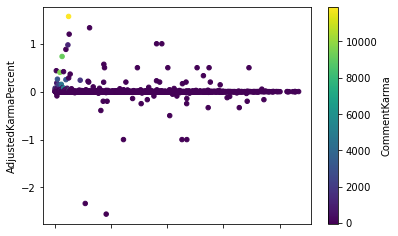

In [4]:
sortByPostSpeed['TotalMinutes'] = sortByPostSpeed['TimeDifference'] / pd.to_timedelta(1, unit = 'm')

FastComments = sortByPostSpeed.plot.scatter(x='TotalMinutes', y='AdjustedKarmaPercent', c = 'CommentKarma',
                                            colormap='viridis')

This is a quick look at the shape of comments from accounts created within the last 30 days, comparing their comment Karma to their date creation.

54


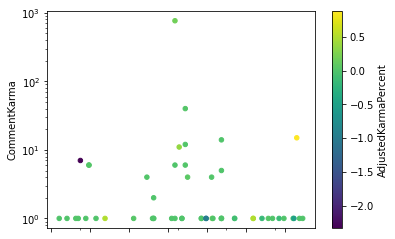

In [5]:
condition = (sortdf['AccountDateTime'] >= start_date) & (sortdf['AccountDateTime'] <= end_date)
newAccounts = sortdf.loc[condition]
print(len(newAccounts))
newAccounts.head(100)

NewAccounts = newAccounts.plot.scatter(x='AccountDateTime', y='CommentKarma', c='AdjustedKarmaPercent', 
                                       logy = True, colormap='viridis')

Here we can see all accounts that started the thread with negative karma. These are accounts I would initially expect to be troll or bot accounts, as maintaining a negative karma on Reddit...can take some work. That or one REALLY downvoted post. I'll print a couple URL's to the comment links, in order to see what kind of comments they are. 

WARNING: This is done in a live Reddit environment, I have no control over the data. The possibility for hateful, NSFW, or outright illegal comments is very likely. I assume no responsibility for the results. FOLLOW THESE LINKS AT YOUR OWN RISK!!!

In [6]:
pd.set_option('display.max_colwidth', None)
condition = (sortByPostSpeed['AdjustedKarma'] < 0)


negativeKarma = sortByPostSpeed.loc[condition]
print(len(negativeKarma))
sample = negativeKarma.sample(n = 5)
sample['CommentURL']

32


532     https://www.reddit.com/r/politics/comments/tr06li/ocasiocortez_to_clarence_thomas_resign_or_face/i2npn1t/
1249          https://www.reddit.com/r/politics/comments/tr29lf/congressional_candidate_who_defied_covid/i2mp89j/
557     https://www.reddit.com/r/politics/comments/tr06li/ocasiocortez_to_clarence_thomas_resign_or_face/i2nmbmf/
887     https://www.reddit.com/r/politics/comments/trdrhr/clarence_thomas_has_recused_himself_from_cases/i2nd3a5/
828      https://www.reddit.com/r/politics/comments/tqyg41/joe_biden_calls_fox_reporter_silly_for_asking/i2n2jfp/
Name: CommentURL, dtype: object

The above query often results in toxic comments. This is to be expected from accounts with a low Karma rating. Let's look at a few of the highest Karma comments; hopefully they will provide more uplifting results.

In [7]:
largestdf = df.nlargest(5, 'CommentKarma')
largestdf.head()
largestdf['CommentURL']

889       https://www.reddit.com/r/politics/comments/tqxa6i/white_house_records_turned_over_to_house_show/i2jxdiz/
7      https://www.reddit.com/r/politics/comments/tr7hoz/trump_asks_putin_to_provide_dirt_on_hunter_biden/i2l3rvy/
893       https://www.reddit.com/r/politics/comments/tqxa6i/white_house_records_turned_over_to_house_show/i2jv5vh/
891       https://www.reddit.com/r/politics/comments/tqxa6i/white_house_records_turned_over_to_house_show/i2jxor9/
676       https://www.reddit.com/r/politics/comments/tqyg41/joe_biden_calls_fox_reporter_silly_for_asking/i2k09fr/
Name: CommentURL, dtype: object

## Conclusion

I have run a very limited number of queries of the past 2 cells, but both of them seem to share the same qualities:

    1) short comments
    2) pointed(borderline toxic) comments
    
It is hard to point to any of these accounts being "bots"(which was my original) intent; but I think it speaks very clearly to the nature of communication on the internet. "Hot takes", or short, often derisive comments, seem to be the king at the upper and lower end of the spectrum. I will need to do further research to try to suss out which accounts are "bots", but it seems a lot of them would be considered "troll" accounts. I have been looking at their post histories, and in general these accounts seem to post short, pointed comments. 
It could be that this is the nature of communication on the internet: it takes a lot more work to post a long, thought out comment, and by nature people may simply do that less on average. It could also be that the accounts at the upper and lower ends of the spectrum have more nefarious means than communication. 

I do not know if this is an answer I am capable of finding, but I hope to do future work on this project with the intent of making more scientific analyses of the information at hand.